feature extraction is used to convert image pixels into feature vectors

In [1]:
!pip install face_recognition
from imutils import paths
import pickle
import cv2
import os
import face_recognition


#get paths of each and every folder containing images
imagePaths = list(paths.list_images(''))
knownEncodings = []
knownNames = []
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the person name from the image path
    name = imagePath.split(os.path.sep)[-2] # Extract the second last element, which is usually the name
    #to load the input image and convert it from BGR(opencv ordering)
    #to dlib ordering (RGB)
    image = cv2.imread(imagePath) # This line was incorrectly indented
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # This line was incorrectly indented

    #Use Face_recognition to locate faces in the image
    boxes = face_recognition.face_locations(rgb, model='hog')
    # compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)
    # loop over the encodings
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)
  #save encodings along with their names in dictionary data
    data = {"encodings": knownEncodings, "names": knownNames}
  #use pickle to save data into a file for later use
    f = open("face_enc", "wb")
    f.write(pickle.dumps(data))
    f.close()




^C


ModuleNotFoundError: No module named 'imutils'

     ---------------------------------------- 0.0/100.1 MB ? eta -:--:--
     ---------------------------------------- 0.3/100.1 MB ? eta -:--:--
     ---------------------------------------- 0.5/100.1 MB 2.9 MB/s eta 0:00:35
      --------------------------------------- 1.3/100.1 MB 2.4 MB/s eta 0:00:41
      --------------------------------------- 1.6/100.1 MB 2.6 MB/s eta 0:00:39
      --------------------------------------- 2.4/100.1 MB 2.6 MB/s eta 0:00:38
     - -------------------------------------- 2.9/100.1 MB 2.7 MB/s eta 0:00:37
     - -------------------------------------- 3.7/100.1 MB 2.8 MB/s eta 0:00:35
     - -------------------------------------- 4.5/100.1 MB 3.0 MB/s eta 0:00:33
     -- ------------------------------------- 5.2/100.1 MB 3.1 MB/s eta 0:00:31
     -- ------------------------------------- 6.0/100.1 MB 3.2 MB/s eta 0:00:30
     -- ------------------------------------- 6.8/100.1 MB 3.2 MB/s eta 0:00:29
     --- ------------------------------------ 7.6/100.

  error: subprocess-exited-with-error
  
  × Building wheel for dlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      <string>:234: SyntaxWarning: invalid escape sequence '\('
      <string>:235: SyntaxWarning: invalid escape sequence '\('
      <string>:236: SyntaxWarning: invalid escape sequence '\('
      running bdist_wheel
      running build
      running build_ext
      
      
                         CMake is not installed on your system!
      
          Or it is possible some broken copy of cmake is installed on your system.
          It is unfortunately very common for python package managers to include
          broken copies of cmake.  So if the error above this refers to some file
          path to a cmake file inside a python or anaconda or miniconda path then you
          should delete that broken copy of cmake from your computer.
      
          Instead, please get an official copy of cmake from one of these known good
   

Detect and recognize the

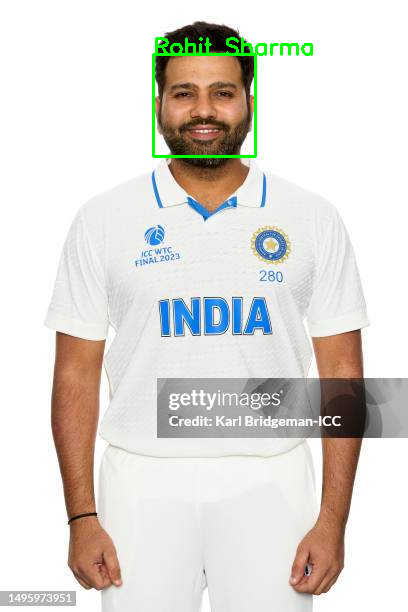

In [ ]:
from google.colab.patches import cv2_imshow
import face_recognition_models
import imutils
import pickle
import cv2
import os
import face_recognition
import time

#detect and recognize the face

#find path of xml file containing haarascade file
cascPathface = os.path.dirname(
    cv2.__file__) + "/data/haarcascade_frontalface_alt2.xml"
# load the harcaascade in the cascade classifier
faceCascade = cv2.CascadeClassifier(cascPathface)
#load the known faces and embeddings saved in the file
file_path = '/content/face_enc'
if os.path.exists(file_path):
    data = pickle.loads(open(file_path, "rb").read())
else:
    print(f"Error: File not found - {file_path}")
    # Handle the case where the file is missing, e.g., create an empty data dictionary
    data = {"encodings": [], "names": []}
#find image path

#find path to the image you want to detect face and pass it here
image=cv2.imread("/content/gettyimages-1495973951-612x612.jpg")
rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#convert image to Greyscale for haarcascade
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
faces=faceCascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,
                                   minSize=(60,60),
                                   flags=cv2.CASCADE_SCALE_IMAGE)
#the facial embeddings for the face is input
encodings=face_recognition.face_encodings(rgb)
names=[]
#loop over the facial embeddings incase
#we have multiple embeddings for multiple fcaes
for encoding in encodings:
  #Compare encodings with encodings in data['encodings']
  #Matches contain array with boolean values and True for the embeddings it matches
  #False for the rest
  matches=face_recognition.compare_faces(data["encodings"],encoding)
  #set name =unknown if no encoding matches
  name="Unknown"
  #check to see if we have found a match
  if True in matches:
    #find the position at which we get true and store them
    #dictionary to count the total number of times each face
    #was matched
    matchedIdxs=[i for (i,b) in enumerate(matches) if b]
    counts={}
    #loop over the matched indexes and maintain a count for
    #each recognized face face
    for i in matchedIdxs:
      #Check the names at respective indexes we stored in matchedIdxs
      name=data["names"][i]
      #increase count for the name we got
      counts[name]=counts.get(name,0)+1
      #set name which has highest count
      name=max(counts,key=counts.get)


    #update the list of names
    names.append(name)
    #loop over the recognized faces
    for ((x,y,w,h),name) in zip(faces,names):
      #rescaling the frame
      #draw predicted face name on the image
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
      cv2.putText(image,name,(x,y),cv2.FONT_HERSHEY_SIMPLEX,0.75,(0,255,0),2)
cv2_imshow(image)
#cv2.waitKey(0)
